What if our data look like this then a line wont really do a good job.
%%HTML
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Loess_curve.svg/220px-Loess_curve.svg.png">
then we need some curve or polynomial, instead of considering lines we consider higher degree polynomials.
e.g:

2$x^3$ + 7$x^2$ + 3$x$ + 4

In general

w1$x^3$ + w2$x^2$ + w3$x$ + w4

now we have to solve it for these four weights, but algorithm is same as previous algo:

1. Draw a line using w1$x^3$ + w2$x^2$ + w3$x$ + w4 (i am choosing degree = 3 just for example. You have to choose different degrees to check which degree gives you a best curve to fit  ) by putting all constants 0 (w1=w2=w3=w4=0)

2. plot it

3. calculate error between line and points

4. update all constants

 - w1 by adding error x p$x^3$ x learning rate   (p is x coordinate of a point)
    
 - w2 by adding error x p$x^2$ x learning rate
   
 - w3 by adding error x p$x$ x learning rate
   
 - w4 by adding error x learning rate

5. repeat this process

## USING MY MODEL

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('data.csv')
data

,Var_X,Var_Y
0,-0.33532,6.66854
1,0.02160,3.86398
2,-1.19438,5.16161
3,-0.65046,8.43823
4,-0.28001,5.57201
5,1.93258,-11.13270
6,1.22620,-5.31226
7,0.74727,-4.63725
8,3.32853,3.80650
9,2.87457,-6.06084


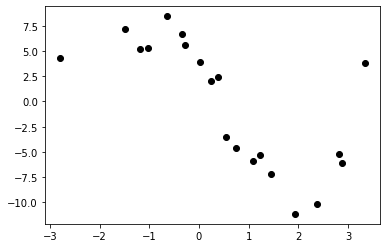

In [5]:
plt.plot(data['Var_X'],data['Var_Y'],'o', color='black')

In [6]:
def error_list(w_1,w_2,w_3,w_4,w_5):
    #i am choosing degree = 4 in my equation, because less than 4 didn't fit a good curve and prediction was also very bad
    #y_pred = (w_1 * x**4) +(w_2 * x**3)+ (w_3 * x**2) +(w_4 * x) + w_5
    y_pred = []
    for i in range(0,len(data['Var_X'])):
        y_pred.append((w_1*(data['Var_X'][i])**4)+ (w_2*(data['Var_X'][i])**3)+ (w_3*(data['Var_X'][i])**2) + (w_4*(data['Var_X'][i])) + w_5)
    # error = y - y_pred
    error = []
    for j in range(0,len(data['Var_X'])):
        error.append(data['Var_Y'][j] - y_pred[j])
    return error

In [7]:
def fit_and_plot(x,y,iterate,learning_rate):
    global w_1
    global w_2
    global w_3
    global w_4
    global w_5
    w_1 = 0
    w_2 = 0
    w_3 = 0
    w_4 = 0
    w_5 = 0

    for i in range(0,iterate): 
        errors = error_list(w_1,w_2,w_3,w_4,w_5)
        # add (q-q') * x*4 * learning rate in w1
        fourth = [i**4 for i in data['Var_X']]
        w_1 += np.matmul(errors,fourth) * learning_rate
        # add (q-q') * x*3 * learning rate in w2
        third = [i**3 for i in data['Var_X']]
        w_2 += np.matmul(errors,third) * learning_rate
        # add (q-q') * x*2 * learning rate in w3
        second = [i**2 for i in data['Var_X']]
        w_3 += np.matmul(errors,second) * learning_rate
         # add (q-q') * x * learning rate in w3
        w_4 += np.matmul(errors,data['Var_X']) * learning_rate
        # add q-q' * learning_rate in w2
        w_5 += sum(errors)* learning_rate
        print("mean squared_error", sum([i**2 for i in errors])/(2*len(errors))) 
    print(w_1,w_2,w_3,w_4,w_5)
    y_pred = []
    for i in range (0,len(data['Var_Y'])):
         y_pred.append((w_1*(data['Var_X'][i])**4)+ (w_2*(data['Var_X'][i])**3)+ (w_3*(data['Var_X'][i])**2) + (w_4*(data['Var_X'][i])) + w_5)
    plt.plot(x,y_pred,'*',color='blue') #showing best fitted curve 

In [24]:
#plt.plot(data['Var_X'],data['Var_Y'], 'o',color='black')
# try it on your computer i am just uploading picture of results
#fit_and_plot(data['Var_X'],data['Var_Y'],20000,0.00006) 


In [27]:
%%HTML
<img src="iteration.PNG">

In [9]:
def predict(x):
    #y = w1*x + w2
    y = []
    for x_value in x:
        y.append((w_1*(x_value)**4)+ (w_2*(x_value)**3)+ (w_3*(x_value)**2) + (w_4*(x_value)) + w_5)
    return y

In [10]:
y_predd = predict(data['Var_X'])

In [12]:
df2 = pd.DataFrame({'Actual': data['Var_Y'], 'Predicted': y_predd})
df2

,Actual,Predicted
0,6.66854,5.196096
1,3.86398,3.238505
2,5.16161,7.003938
3,8.43823,6.343059
4,5.57201,4.936866
5,-11.13270,-10.489216
6,-5.31226,-6.370343
7,-4.63725,-2.345187
8,3.80650,4.372043
9,-6.06084,-5.700003


## USING SKLEARN

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [14]:
train_data = pd.read_csv('data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
#or 
#X = train_data[['Var_X']]
y = train_data['Var_Y'].values
#or
#y = train_data[['Var_Y']]



In [15]:
# Create a PolynomialFeatures object, then fit and transform the
# predictor feature

#it will gives 4 degree polynomial object
poly_feat = PolynomialFeatures(degree = 4)

#fit your x a/c to these polynomial features
X_poly = poly_feat.fit_transform(X)
pd.DataFrame(X_poly) # i don't what is the meaning of this 1.0 in 0th column but 1th col = x**4 , 2nd col = x**3 , 3rd = x**2 and 4th = x

,0,1,2,3,4
0,1.0,-0.33532,0.112440,-0.037703,1.264264e-02
1,1.0,0.02160,0.000467,0.000010,2.176782e-07
2,1.0,-1.19438,1.426544,-1.703835,2.035027e+00
3,1.0,-0.65046,0.423098,-0.275208,1.790121e-01
4,1.0,-0.28001,0.078406,-0.021954,6.147438e-03
5,1.0,1.93258,3.734865,7.217926,1.394922e+01
6,1.0,1.22620,1.503566,1.843673,2.260712e+00
7,1.0,0.74727,0.558412,0.417285,3.118245e-01
8,1.0,3.32853,11.079112,36.877157,1.227467e+02
9,1.0,2.87457,8.263153,23.753011,6.827969e+01


In [16]:
# Make and fit the polynomial regression model
#Create a LinearRegression object and fit it to the polynomial predictor features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

In [17]:
prediction = poly_model.predict(X_poly)

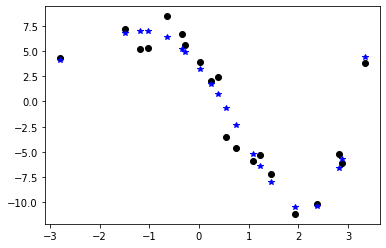

In [18]:
plt.plot(X,y,'o',color='black') 
plt.plot(X,prediction,'*',color='blue') # our best fitted curve

In [19]:
df1 = pd.DataFrame({'Actual': y, 'Predicted': prediction})
df1

,Actual,Predicted
0,6.66854,5.196414
1,3.86398,3.238856
2,5.16161,7.003997
3,8.43823,6.343305
4,5.57201,4.937193
5,-11.13270,-10.489402
6,-5.31226,-6.370260
7,-4.63725,-2.344939
8,3.80650,4.372330
9,-6.06084,-5.700148
